Sky Kapoor and Chris Compierchio

This program will est the accuracy and timing of the Gaussian elimination, partial
pivoting, and LU decomposition approaches to solving Matrix equations

PART A

In [5]:
# SolveLinear.py
# Python module for PHY407
# Paul Kushner, 2015-09-26
# Modifications by Nicolas Grisouard, 2018-09-26
# This module contains useful routines for solving linear systems of equations.
# Based on gausselim.py from Newman

#Import Libraries
from numpy import empty
import numpy as np
from numpy.linalg import solve
from numpy.random import rand
from numpy import empty, copy
from time import time
import matplotlib.pyplot as plt

#Define Partial Pivot function
def PartialPivot(A_in, v_in):
    #loop through the 1st column of the matrix
    for i in range(len(v_in)-1):
        n = A_in[i]
        #if the element in the given row is less than the element in the next row down:
        if np.abs(n[i]) < np.abs(n[i+1]):
            n = A_in[i+1]
            #Place the row with the highest first entry at spot 0 in the matrix
            A_in[0], A_in[i] = copy(A_in[i]), copy(A_in[0])
            v_in[0], v_in[i] = copy(v_in[i]), copy(v_in[0]) 
    #send the new array through the gausselim function to complete the process
    return GaussElim(A_in, v_in)

#Define GaussElim function
def GaussElim(A_in, v_in):
    """Implement Gaussian Elimination. This should be non-destructive for input
    arrays, so we will copy A and v to
    temporary variables
    IN:
    A_in, the matrix to pivot and triangularize
    v_in, the RHS vector
    OUT:
    x, the vector solution of A_in x = v_in """
    # copy A and v to temporary variables using copy command
    A = copy(A_in)
    v = copy(v_in)
    N = len(v)

    for m in range(N):
        # Divide by the diagonal element
        div = A[m, m]
        if div == 0:
            PartialPivot(A, v)
        else:
            A[m, :] /= div
            v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1, N):
            mult = A[i, m]
            A[i, :] -= mult*A[m, :]
            v[i] -= mult*v[m]

    # Backsubstitution
    # create an array of the same type as the input array
    x = empty(N, float)
    for m in range(N-1, -1, -1):
        x[m] = v[m]
        for i in range(m+1, N):
            x[m] -= A[m, i]*x[i]
    return x




In [6]:
#Define N
N = 3
#Define the array from the textbook example
A1 = np.array([[2,1,4,1],
     [3,4,-1,-1],
     [1,-4,1,5],
     [2,-2,1,3]], float)
#Define the vectr from the textbook example
v1 = np.array([-4,3,9,7], float)

#Print results
print(GaussElim(A1, v1))

[ 2. -1. -2.  1.]


PART b

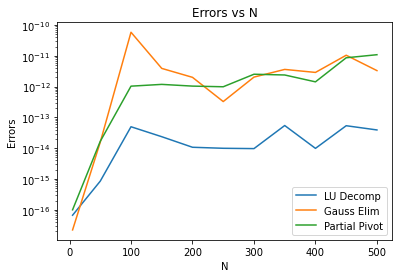

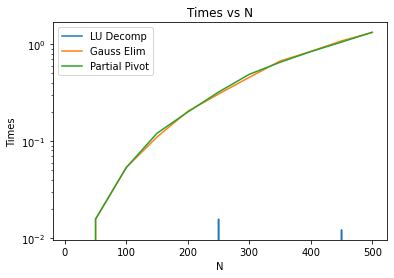

In [8]:
#Define  values
N = [5, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

#Create arrays to store the times for each method
time1 = np.zeros(len(N))
time2 = np.zeros(len(N))
time3 = np.zeros(len(N))

#Create arrays to store the errors for each method
err1 = np.zeros(len(N))
err2 = np.zeros(len(N))
err3 = np.zeros(len(N))

#Loop through N
for i in range(len(N)):
    #Create a random vector and matrix
    v = rand(N[i])
    A = rand(N[i], N[i])

    #Time LU Decomposition
    start_time1 = time()
    x = solve(A, v)
    end_time1 = time()

    time1[i] = end_time1 - start_time1

    #Time Gaussian Elimination
    start_time2 = time()
    y = GaussElim(A, v)
    end_time2 = time()

    time2[i] = end_time2 - start_time2

    #Time Partial Pivot
    start_time3 = time()
    z = PartialPivot(A, v)
    end_time3 = time()

    time3[i] = end_time3 - start_time3

    #Solve each using np.dot
    vsol1 = np.dot(A, x)
    vsol2 = np.dot(A, y)
    vsol3 = np.dot(A, z)

    #Calculate the errors of each method
    err1[i] = np.mean(np.abs(v-vsol1))
    err2[i] = np.mean(np.abs(v-vsol2))
    err3[i] = np.mean(np.abs(v-vsol3))

#Plot errors against N
plt.semilogy(N, err1, label = "LU Decomp")
plt.semilogy(N, err2, label = "Gauss Elim")
plt.semilogy(N, err3, label = "Partial Pivot")

plt.title("Errors vs N")
plt.xlabel("N")
plt.ylabel("Errors")
plt.legend(loc="best")
plt.show()

#Plot times against N
plt.semilogy(N, time1, label = "LU Decomp")
plt.semilogy(N, time2, label = "Gauss Elim")
plt.semilogy(N, time3, label = "Partial Pivot")

plt.title("Times vs N")
plt.xlabel("N")
plt.ylabel("Times")
plt.legend(loc="best")
plt.show()
